In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.model_selection as ms

In [2]:
X_train = pd.read_csv('X_train.csv.gz', compression='gzip')
y_train = pd.read_csv('y_train.csv.gz', compression='gzip')
X_test = pd.read_csv('X_test.csv.gz', compression='gzip')

# 1. Eksploracja

In [3]:
print(f"Ilość obserwacji w X_train: {X_train.shape[0]}")
print(f"Ilość zmiennych w X_train: {X_train.shape[1]}")

Ilość obserwacji w X_train: 3794
Ilość zmiennych w X_train: 9000


In [4]:
X_train.info()
# wszystkie zmienne są typu float64, więc nie ma potrzeby dokonywania konwersji

print()

print(f"Brakujące wartości w X_train: {X_train.isnull().sum().sum()}")
print(f"Brakujące wartości w y_train: {y_train.isnull().sum().sum()}")
print(f"Ilość obserwacji X_train = y_train: {X_train.shape[0] == y_train.shape[0]}")
# dane są kompletne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Columns: 9000 entries, LINC01128 to AL592183.1
dtypes: float64(9000)
memory usage: 260.5 MB

Brakujące wartości w X_train: 0
Brakujące wartości w y_train: 0
Ilość obserwacji X_train = y_train: True


count    3794.000000
mean        1.012493
std         1.354493
min         0.000000
25%         0.092427
50%         0.252553
75%         2.335047
max         5.104848
Name: Expected, dtype: float64


<Axes: xlabel='Expected', ylabel='Count'>

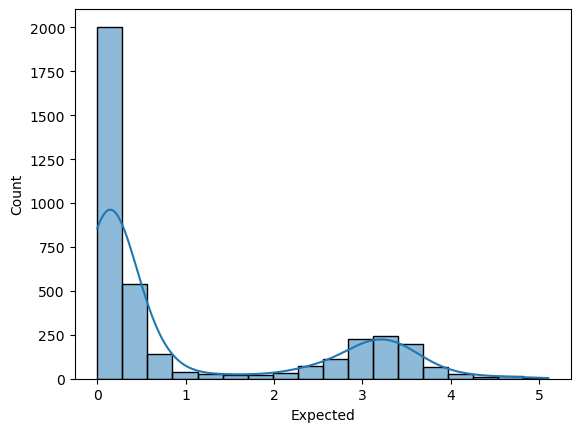

In [5]:
print(y_train['Expected'].describe())
sns.histplot(y_train['Expected'], kde=True)

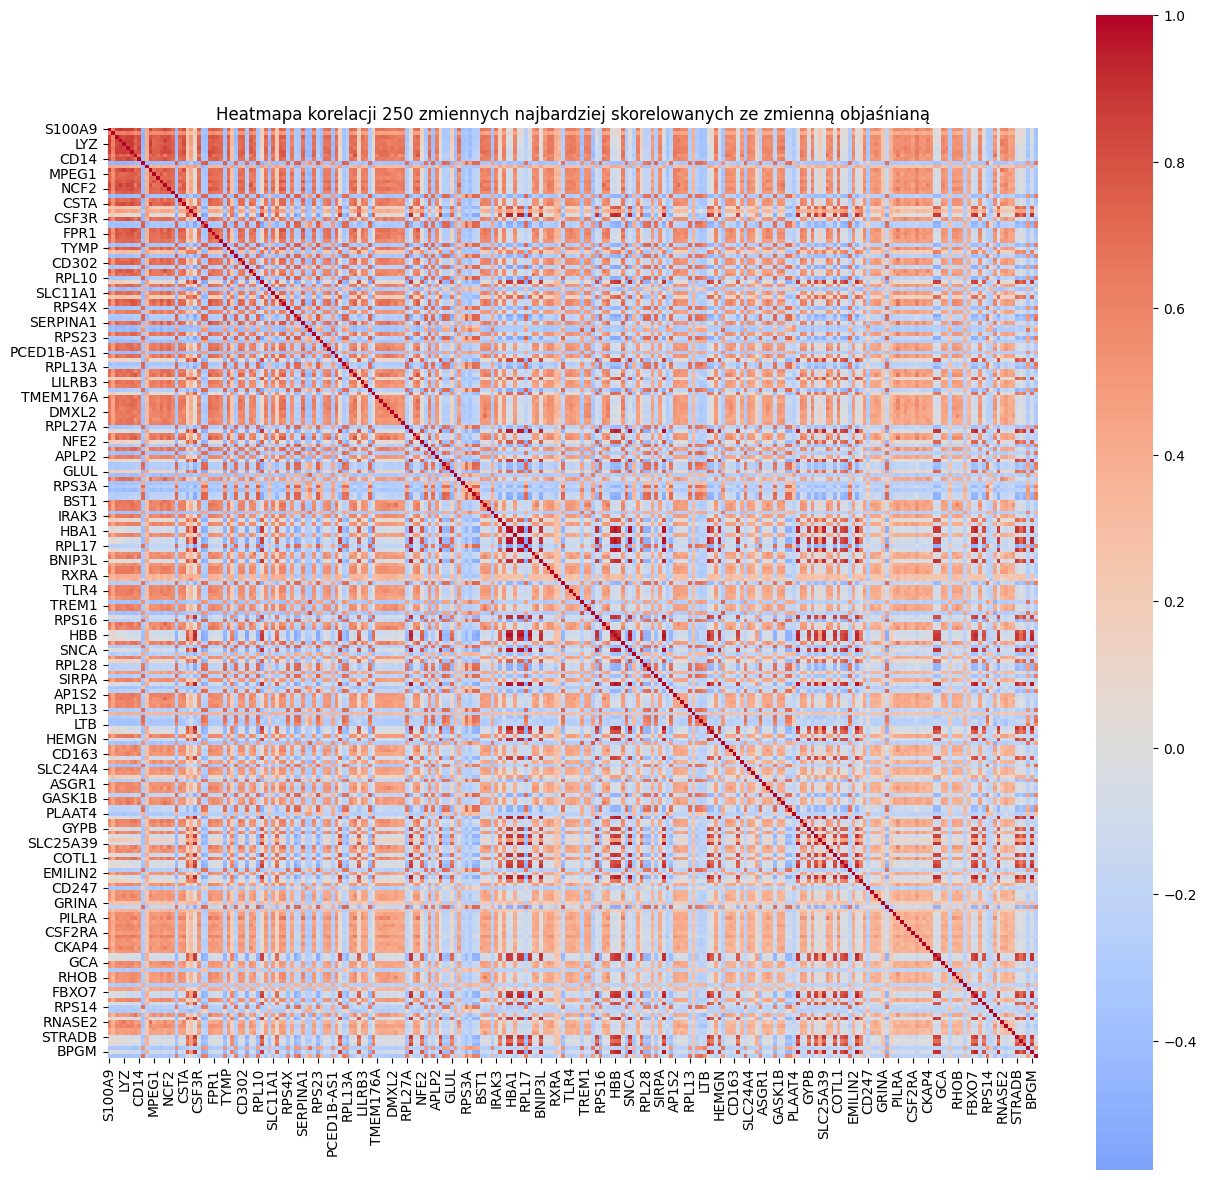

In [33]:
correlation = X_train.corrwith(y_train['Expected'])
correlation = correlation.abs().sort_values(ascending=False)
correlation = correlation.head(250)

correlation_matrix = X_train[correlation.index].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, square=True)
plt.title('Heatmapa korelacji 250 zmiennych najbardziej skorelowanych ze zmienną objaśnianą')
plt.show()

In [6]:
# Pierwszy model, który należy wytrenować, to ElasticNet. Którego szczególne przypadki stanowią
# regresja grzbietowa (ridge regression) oraz lasso.
# (a) Przedstaw w raporcie informacje o modelu ElasticNet, objaśniając parametry, które są w nim
# estymowane, optymalizowaną funkcję oraz hiperparametry, od których ona zależy. Dla jakich
# wartości hiperparametrów otrzymujemy regresję grzbietową, a dla jakich lasso?
# (b) Zdefiniuj siatkę (grid) hiperparametrów, opartą na co najmniej trzech wartościach każdego
# z hiperparametrów. Zadbaj o to, by w siatce znalazły się konfiguracje hiperparametrów odpowiadające regresji grzbietowej i lasso. Użyj walidacji krzyżowej do wybrania odpowiednich
# hiperparametrów (o liczbie podzbiorów użytych w walidacji krzyżowej należy zdecydować samodzielnie oraz uzasadnić swój wybór).
# (c) Podaj błąd treningowy i walidacyjny modelu (należy uśrednić wynik względem wszystkich
# podzbiorów wyróżnionych w walidacji krzyżowej).

# 2. ElasticNet

In [ ]:
en = lm.ElasticNet()
params = {
    # Zadbaj o to, by w siatce znalazły się konfiguracje hiperparametrów odpowiadające regresji grzbietowej i lasso. Użyj walidacji krzyżowej do wybrania odpowiednich
    # hiperparametrów (o liczbie podzbiorów użytych w walidacji krzyżowej należy zdecydować samodzielnie oraz uzasadnić swój wybór).
    'l1_ratio': [0, 0.2, 0.5, 0.7, 1], # 0 - regresja grzbietowa, 1 - lasso
    'alpha': [0.1, 0.5, 1, 10]
}
grid = ms.GridSearchCV(en)